** Data preprocessing**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# View basic info
df.info()

# Check for missing values
df.isnull().sum()

# Get statistical summary
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#If a column has too many missing values (like Cabin with ~77% missing), it's better to drop it.
df.drop(columns=['Cabin'], inplace=True)


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)


<ipython-input-4-63d4fb902a4f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
# Optional
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


In [ ]:
# Only 2 values are usually missing. Fill them with the mode (most frequent port).
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-6-eef6ff0d0a9e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [ ]:
# Find duplicate rows
df.duplicated().sum()

# Drop duplicates if found
df.drop_duplicates(inplace=True)


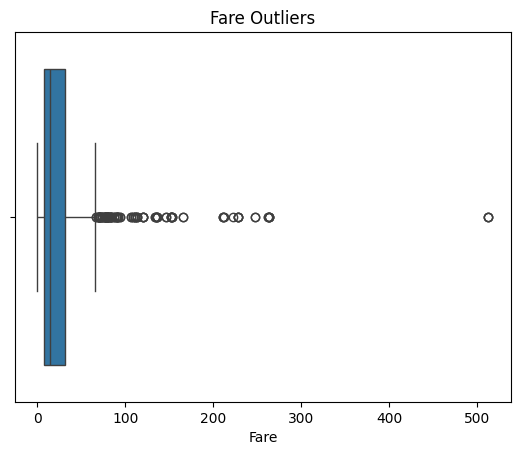

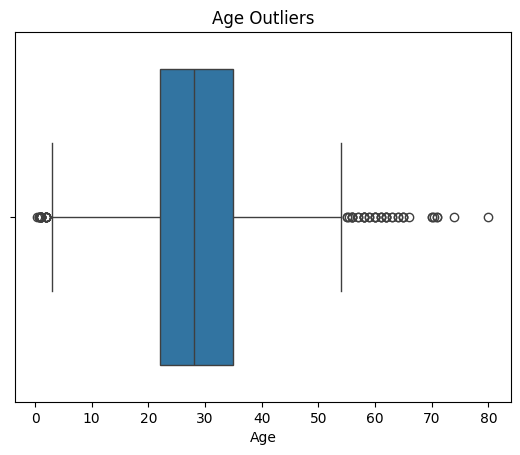

In [ ]:
# Chack for outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

sns.boxplot(x=df['Age'])
plt.title("Age Outliers")
plt.show()


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Encode 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


# EDA

In [ ]:
# Shape of the dataset
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Data types and null values
print("\nData Types & Missing Values:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Rows: 891
Columns: 12

Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB
None

Statistical Summary:
       PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.0000

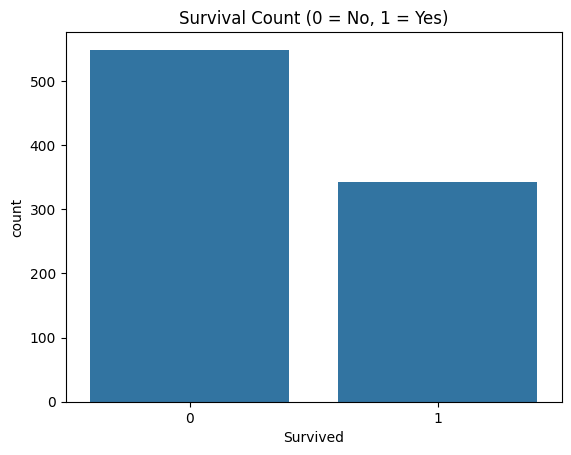

Survival Rate:
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

# Percentage
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print("Survival Rate:\n", survival_rate)


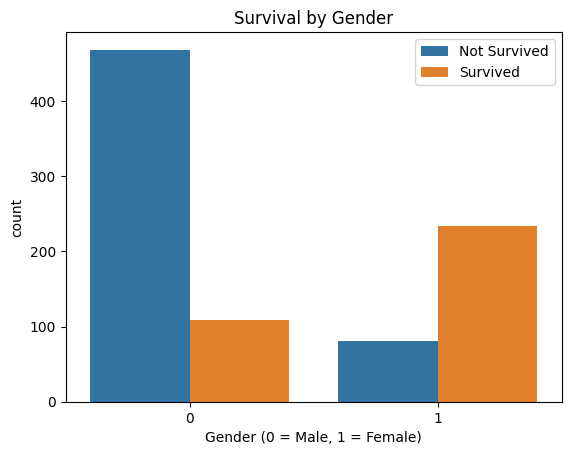

Survival rate by Gender:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Gender (0 = Male, 1 = Female)")
plt.legend(["Not Survived", "Survived"])
plt.show()

# Survival rate by gender
print("Survival rate by Gender:")
print(df.groupby('Sex')['Survived'].mean())


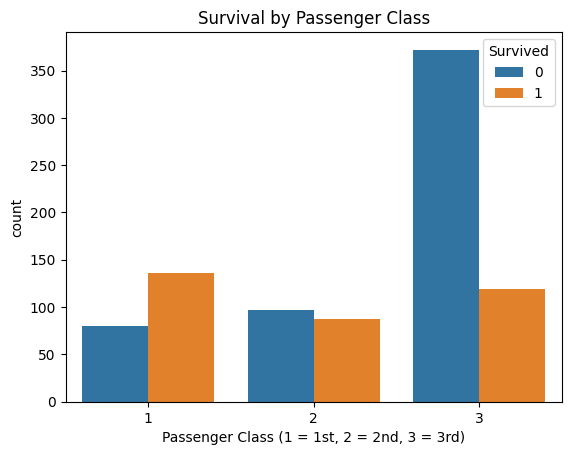

Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.show()

print("Survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())


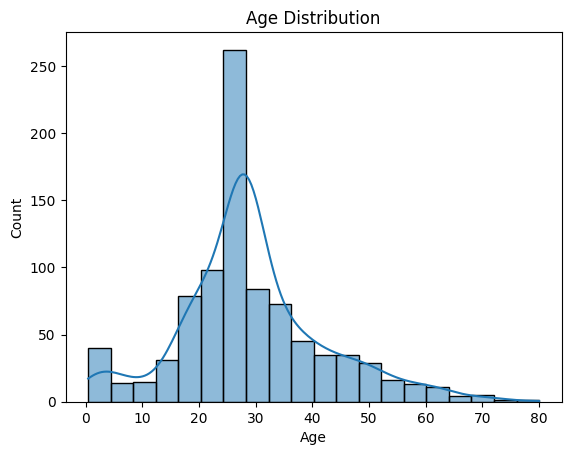

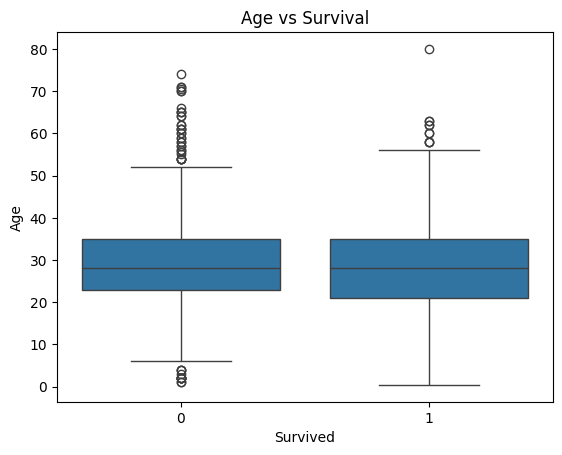

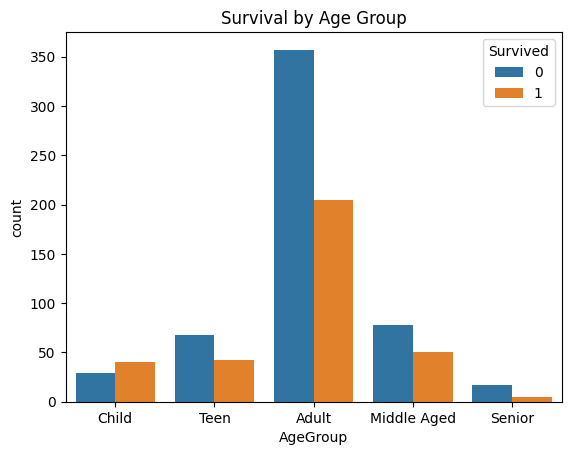

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Boxplot by survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

# Age bins survival rate
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)
plt.title("Survival by Age Group")
plt.show()


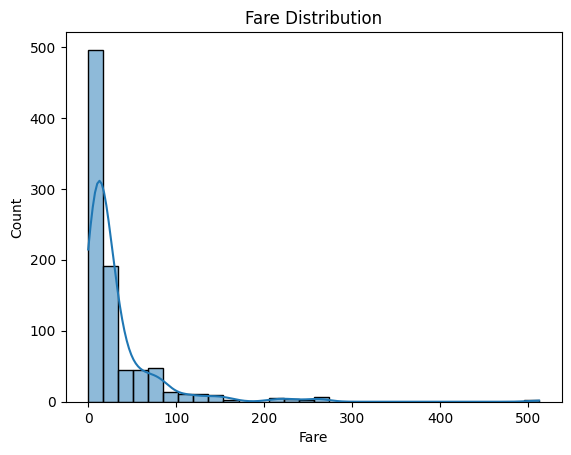

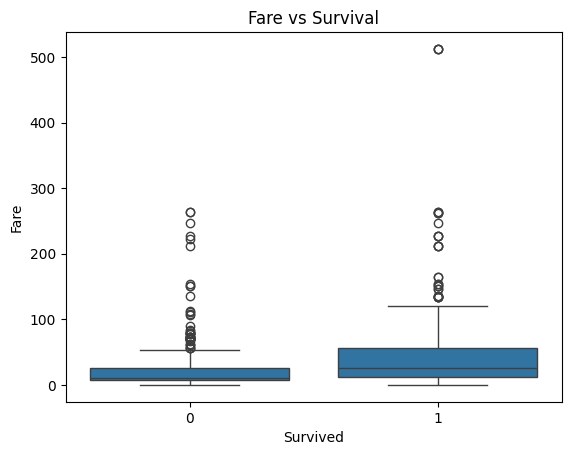

In [ ]:
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

# Boxplot
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()


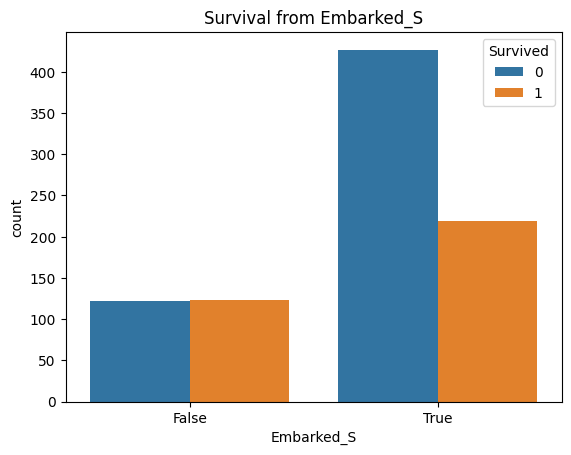

In [ ]:
sns.countplot(x='Embarked_S', hue='Survived', data=df)
plt.title("Survival from Embarked_S")
plt.show()

# OR if original 'Embarked' column is still there:
# sns.countplot(x='Embarked', hue='Survived', data=df)
# plt.title("Survival by Embarkation Port")
# plt.show()


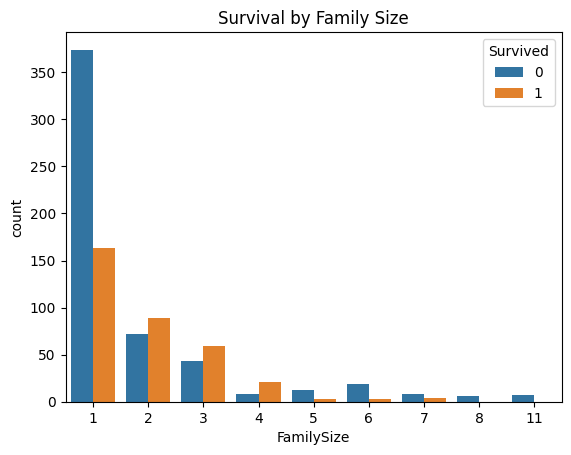

In [ ]:
# Create 'FamilySize' column by summing 'SibSp' (siblings/spouses) and 'Parch' (parents/children)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves

# Now you can create the countplot
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()


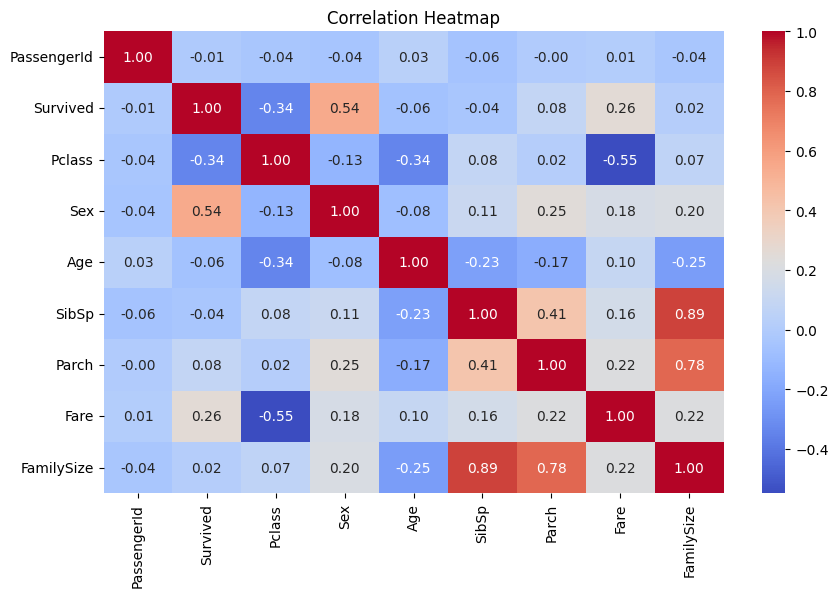

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


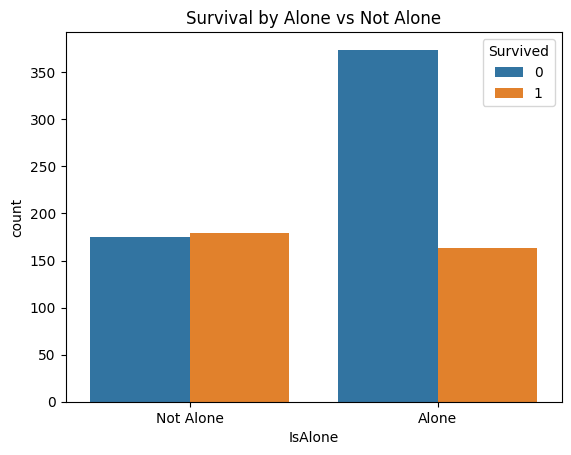

In [ ]:
# Create the 'IsAlone' column based on 'FamilySize'
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

# Now you can create the countplot
sns.countplot(x='IsAlone', hue='Survived', data=df)
plt.title("Survival by Alone vs Not Alone")
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.show()



# Data Analysis & Data Visualization

Survival Counts:
 Survived
0    549
1    342
Name: count, dtype: int64

Survival Rate (%):
 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


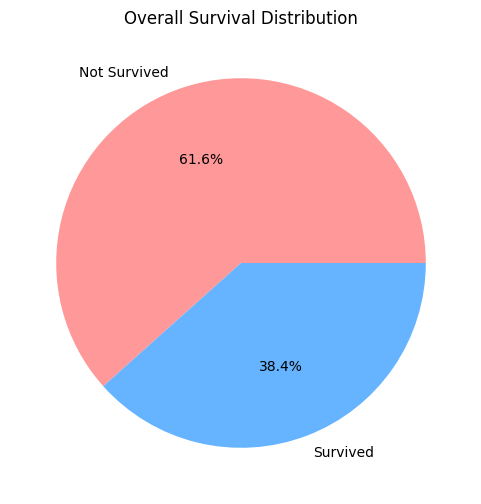

In [ ]:
survival_counts = df['Survived'].value_counts()
survival_rate = df['Survived'].value_counts(normalize=True) * 100

print("Survival Counts:\n", survival_counts)
print("\nSurvival Rate (%):\n", survival_rate)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title("Overall Survival Distribution")
plt.show()


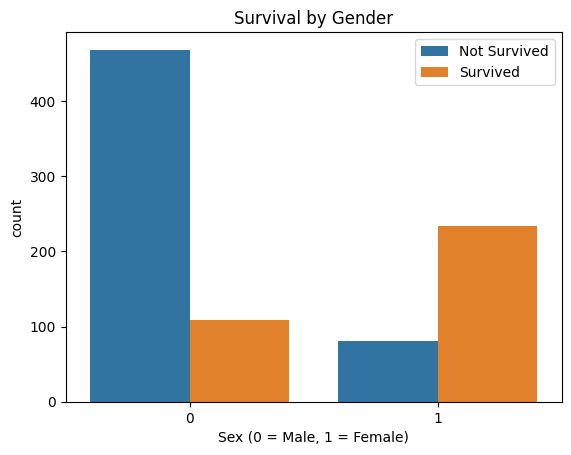

Survival rate by Gender:
Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.legend(["Not Survived", "Survived"])
plt.show()

# Analysis
print("Survival rate by Gender:")
print(df.groupby('Sex')['Survived'].mean() * 100)


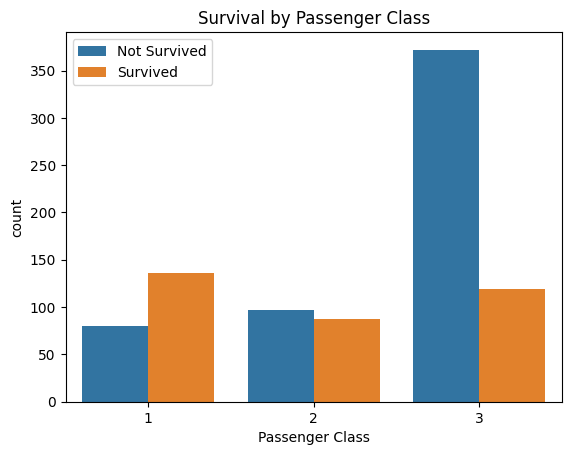

Survival rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.legend(["Not Survived", "Survived"])
plt.show()

# Analysis
print("Survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean() * 100)


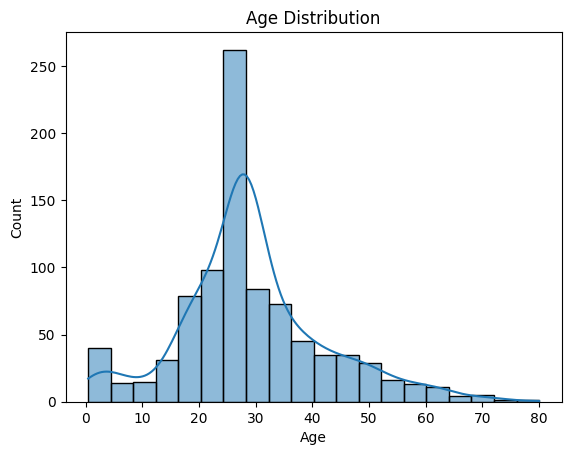

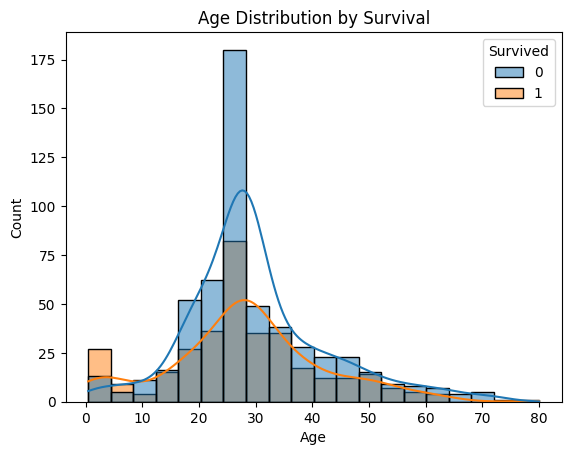

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Age vs Survival
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


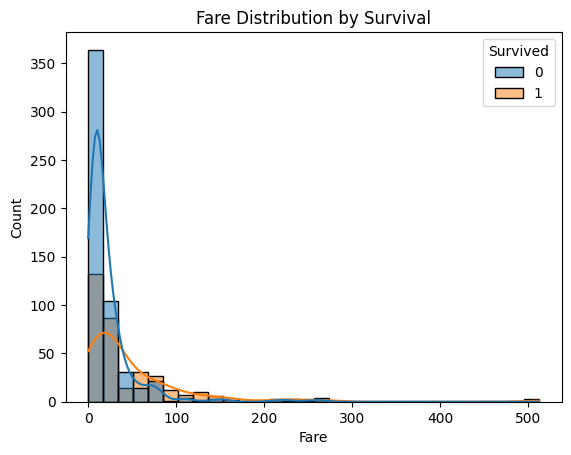

In [ ]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=True)
plt.title("Fare Distribution by Survival")
plt.show()


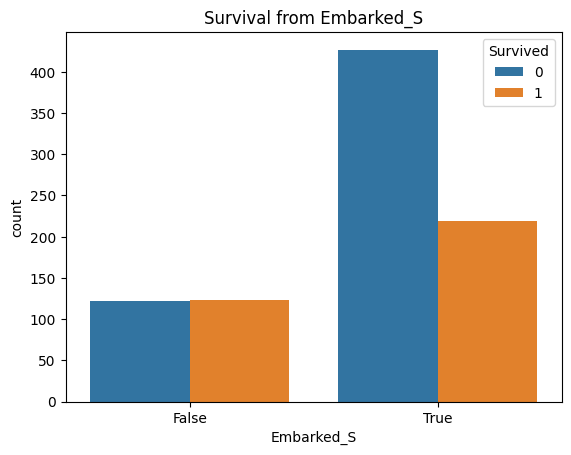

In [ ]:
# Assuming original column was still available:
sns.countplot(x='Embarked_S', hue='Survived', data=df)
plt.title("Survival from Embarked_S")
plt.show()


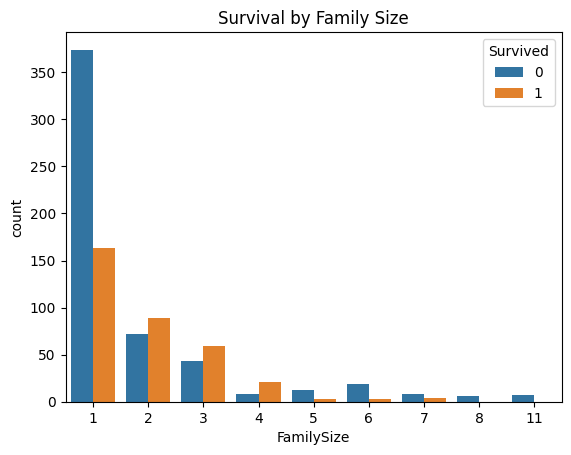

In [ ]:
# Create FamilySize if not already:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()


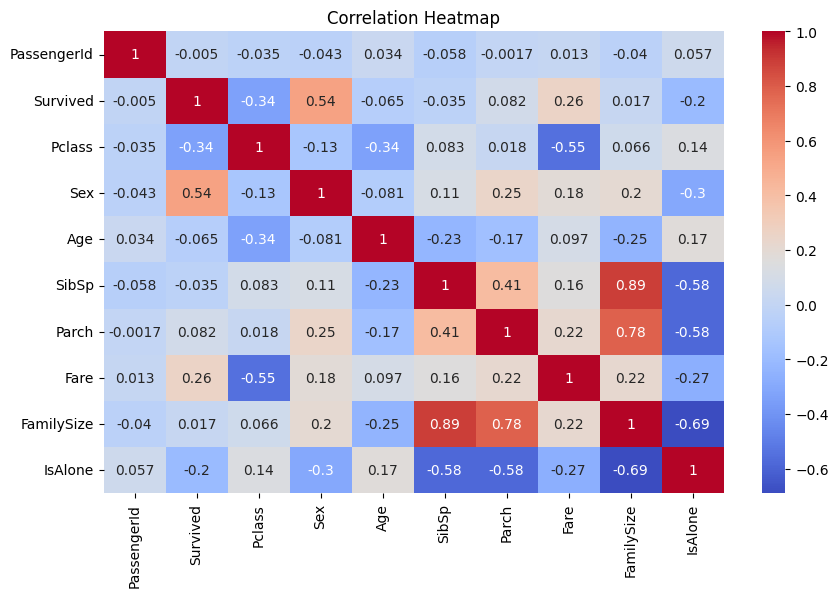

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm') # Select only numerical features
plt.title("Correlation Heatmap")
plt.show()



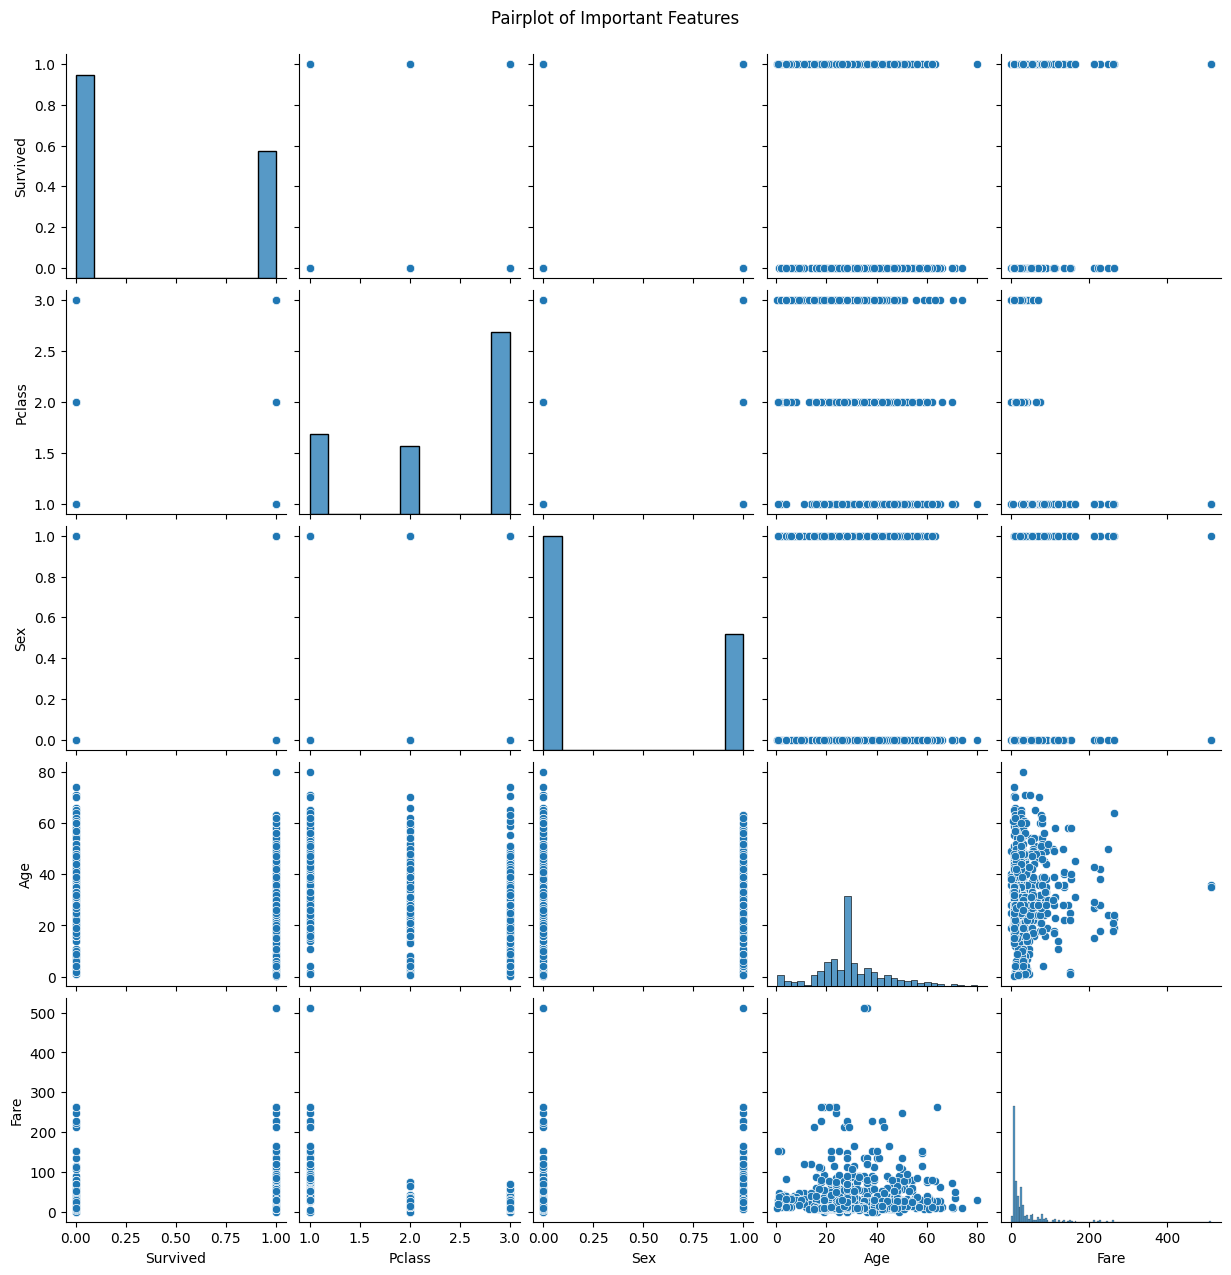

In [ ]:
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']])
plt.suptitle("Pairplot of Important Features", y=1.02)
plt.show()


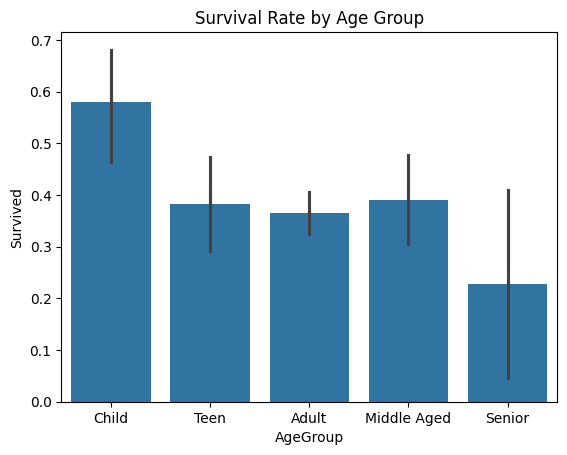

In [ ]:
# Survival by AgeGroup
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()


# 10 Questions with Answers & Plots (Titanic Dataset)**bold text**

<ipython-input-36-68b613291fa8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


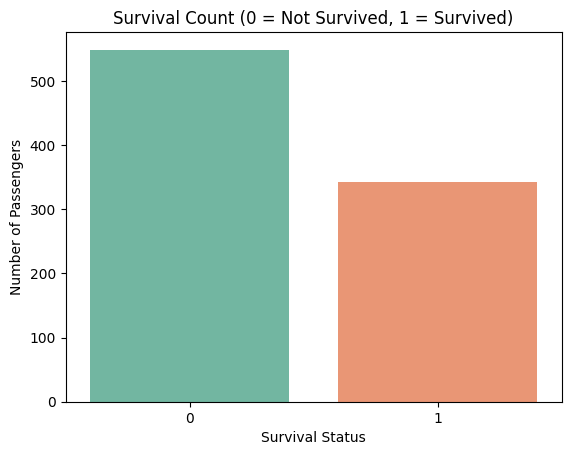

Survival Counts:
 Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
# Q1: How many passengers survived and how many didn't?
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Count (0 = Not Survived, 1 = Survived)")
plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.show()

# Text answer
survival_counts = df['Survived'].value_counts()
print("Survival Counts:\n", survival_counts)
#  Answer: Out of all passengers, majority did not survive. The count plot shows significantly more deaths than survivals.



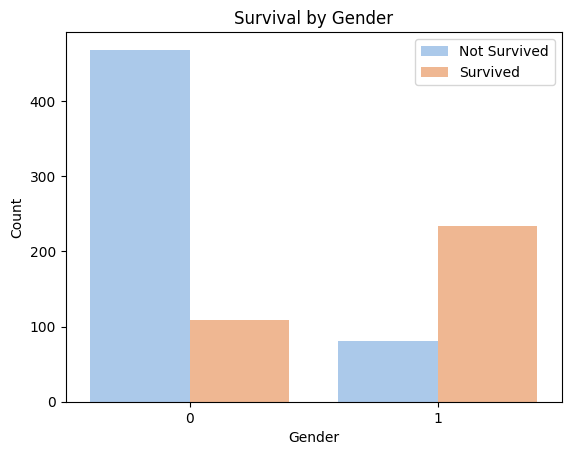

In [ ]:
# Q2: Did gender impact survival rates?
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()
# Answer:Yes, females had a much higher survival rate than males. Most females survived, while most males did not.

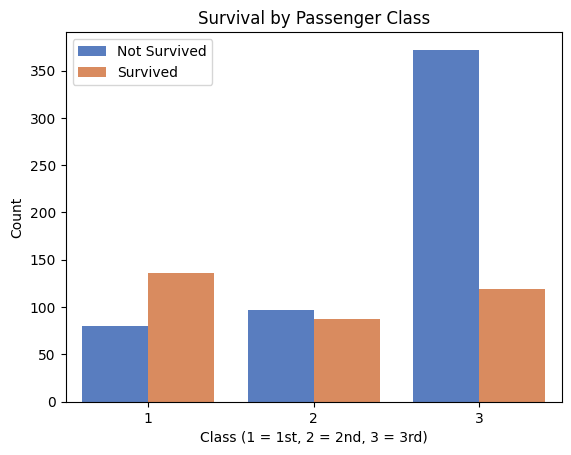

In [ ]:
# Q3: Did passenger class affect survival chances?
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')
plt.title("Survival by Passenger Class")
plt.xlabel("Class (1 = 1st, 2 = 2nd, 3 = 3rd)")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()
# Answer:Yes. 1st class passengers had the highest survival rate, while 3rd class passengers had the lowest.

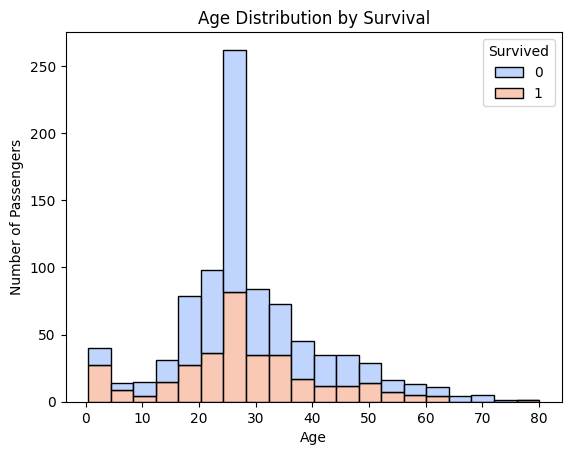

In [ ]:
# Q4: What was the age distribution of survivors vs non-survivors?
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=20, palette='coolwarm')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.show()
# Answer: Most passengers were between 20-40 years. Younger children had higher survival rates than older adults.



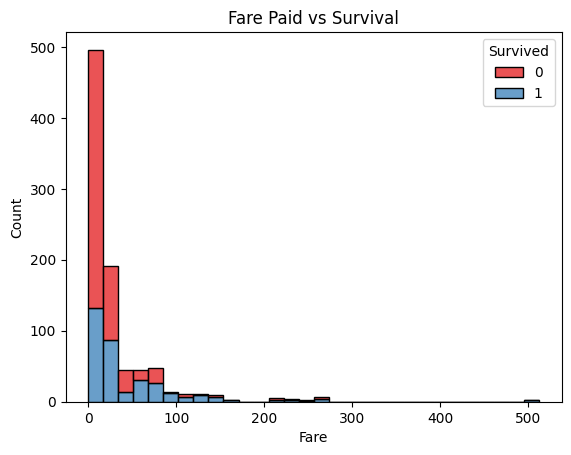

In [ ]:
# Q5: Was fare amount related to survival?
sns.histplot(data=df, x='Fare', hue='Survived', multiple='stack', bins=30, palette='Set1')
plt.title("Fare Paid vs Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()
# Answer: Yes. Passengers who paid higher fares had better chances of survival, indicating wealth/class had an impact.



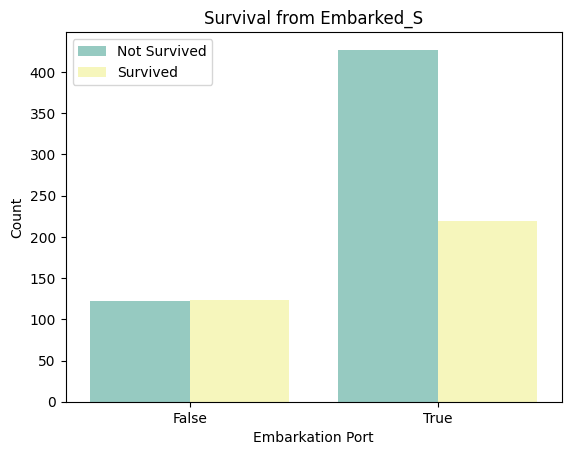

In [ ]:
# Q6: Which embarkation port had the highest survival rate?
sns.countplot(x='Embarked_S', hue='Survived', data=df, palette='Set3')  # Changed 'Embarked' to 'Embarked_S'
plt.title("Survival from Embarked_S") # Changed title to reflect column name change
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.legend(["Not Survived", "Survived"])
plt.show()
# Answer:Passengers from port ‘C’ (Cherbourg) had the highest survival rate, while ‘S’ had the lowest. # Consider updating answer to match new insights.

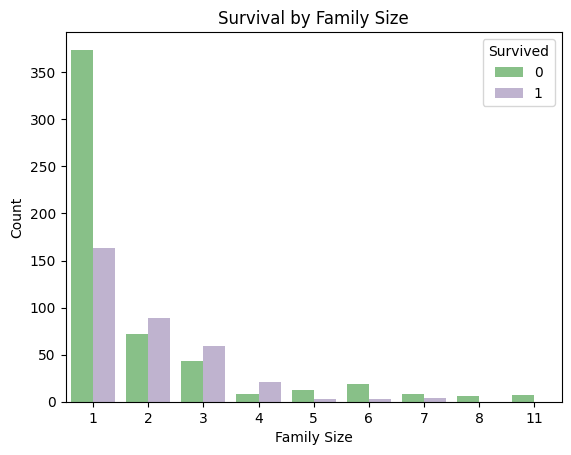

In [ ]:
# Q7: Did having a family help in survival?
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='Accent')
plt.title("Survival by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()
# Answer:Passengers with small families (2–4 members) had better survival rates than those alone or with large families.

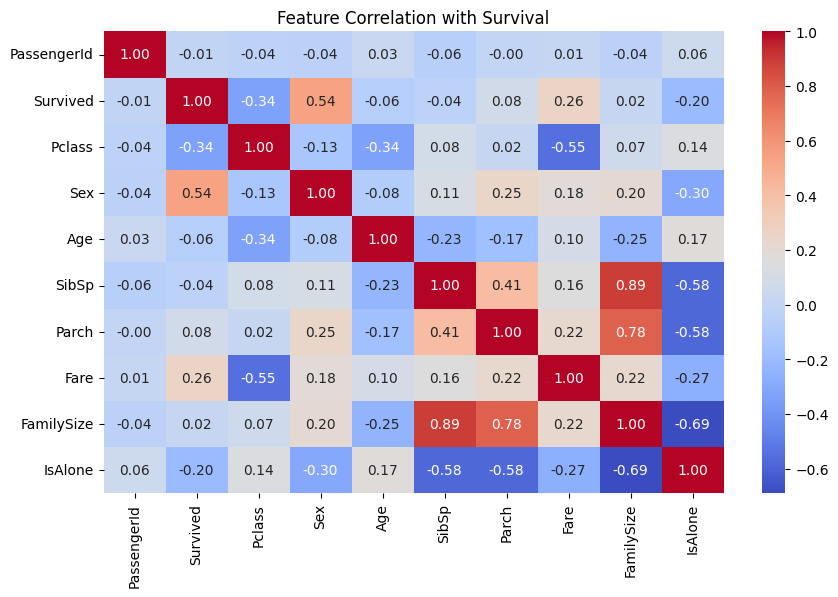

In [ ]:
# Q8: What’s the correlation between features and survival?

plt.figure(figsize=(10,6))
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Survival")
plt.show()
# Answer:
#The strongest positive correlations with survival were:
#Being female
#Paying higher fare
#Being in 1st class

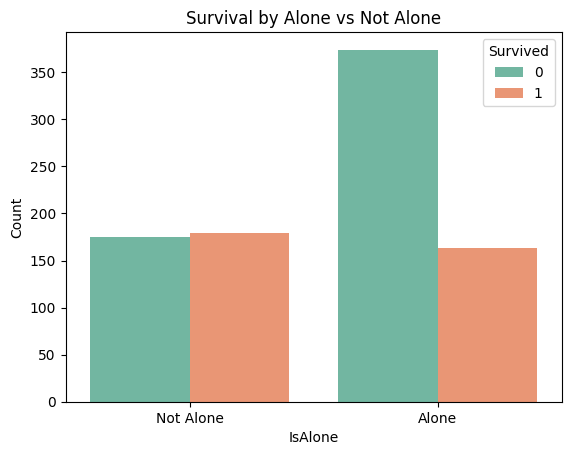

In [ ]:
# Q9: Did being alone reduce the chance of survival?
sns.countplot(x='IsAlone', hue='Survived', data=df, palette='Set2')
plt.title("Survival by Alone vs Not Alone")
plt.xticks([0, 1], ['Not Alone', 'Alone'])
plt.ylabel("Count")
plt.show()
# Answer:Yes. Passengers traveling alone were less likely to survive compared to those with family.

<ipython-input-47-73e2053362e8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='coolwarm')


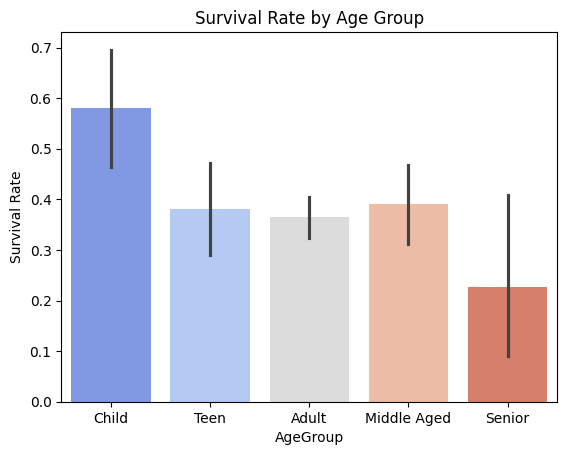

In [ ]:
# Q10: Which age group had the highest survival rate?
# Create Age Group if not created
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=['Child', 'Teen', 'Adult', 'Middle Aged', 'Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=df, palette='coolwarm')
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.show()
#Answer:Children had the highest survival rate, followed by teens. Seniors and middle-aged adults had the lowest.